## Simple Regression Example

In [1]:
import tensorflow as tf
import numpy as np

np.random.seed(5)
tf.set_random_seed(5)

Make some linear data for regression - make a linspace and add noise

In [2]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
x_data

array([-0.83402049,  2.22330803,  1.34237969,  4.58916606,  4.40967801,
        5.89078714,  7.46439024,  7.83303174,  8.27929039,  9.06316369])

In [3]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([-1.25777619,  1.826432  ,  2.04614989,  2.30826294,  5.58425554,
        4.87781494,  6.40937172,  7.16601758,  9.27525262, 10.23951343])

Plotting this thing

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

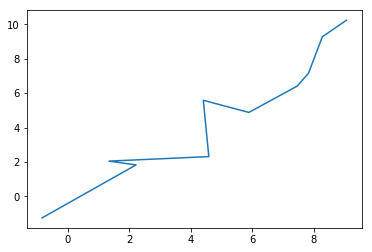

In [8]:
plt.plot(x_data, y_label); # That semicolon is to supress the output of the plt.show()

Oh that is messed up by the noise but there is a linear trend here

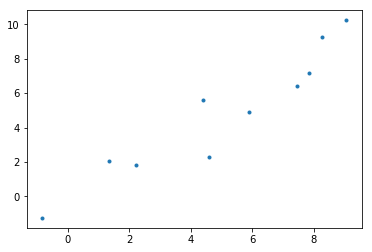

In [10]:
plt.plot(x_data, y_label, '.');

y = mx + b

In [13]:
someList = np.random.rand(2)
someList

array([0.32756395, 0.1441643 ])

Make tf Variables for m and b

In [16]:
m = tf.Variable(someList[0])
b = tf.Variable(someList[1])

These are initialized (yet to be) with totally random numbers

In [17]:
error = 0
for x,y in zip(x_data, y_label):
    y_hat = m*x + b # predicted value
    error += (y - y_hat)**2 # Squared error - we need to minimize this

In [18]:
# Create an optimizer object and specify the optimization technique and learning rate
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
# make a train object from the optimizer object and specify which is the variable to minimize
train = optimizer.minimize(error)

In [19]:
# Make init object
init = tf.global_variables_initializer()

In [21]:
# Make session and run it
with tf.Session() as sess:
    # initialize the variables first
    sess.run(init)
    # decide the number of epochs
    training_steps = 1 # epochs
    # iterate the epochs
    for i in range(training_steps):
        # run it on the train object that contains the error varible
        sess.run(train)
    # grab the values of m and b from the session
    final_slope, final_intercept = sess.run([m, b])

In [22]:
final_slope

0.7742635733191762

In [23]:
final_intercept

0.20530410899252413

In [24]:
error

<tf.Tensor 'add_19:0' shape=() dtype=float64>

Evaluate the results

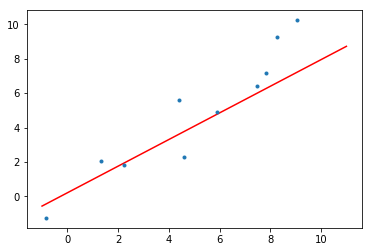

In [26]:
x_test = np.linspace(-1, 11, 10)
# y = mx + b
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '.')

### What if we run it for a hundred epochs?

In [31]:
# Make an error val = 0
error = 0
# cumulate the error
for x, y in zip(x_data, y_label):
    y_hat = m*x+b
    error += (y - y_hat)**2
# create gradient descent optimizer object
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
# create train object which minimizes the error var
train = optimizer.minimize(error)

In [32]:
with tf.Session() as sess:
    # Initialize the variables m and b
    sess.run(init) 
    # decide number of epochs
    epochs = 100
    # train for # epochs
    for epoch in range(epochs):
        sess.run(train)
    # grab the final slope and final intercept
    final_slope, final_intercept = sess.run([m, b])

In [33]:
final_slope

0.9888976998006935

In [34]:
final_intercept

-0.025509809847894374

Evaluate the new results

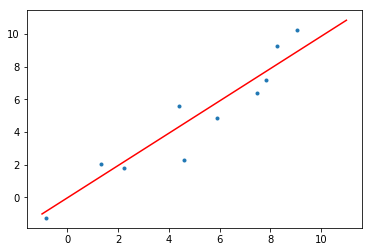

In [35]:
x_test = np.linspace(-1, 11, 10)
# y = mx + b
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '.')